@author : **banajbedi**

In [19]:
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import math
import os

**READING DATA**

In [18]:
df = pd.read_csv('DATASET.csv')
df

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Sec_1,1.0,324.0,354.5,17.0,0.0,3.0,117.0,2600.0,400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2.0,324.0,161.1,18.2,0.0,4.0,106.0,5950.0,1190.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3.0,324.0,170.7,18.5,0.0,4.0,110.0,5950.0,1190.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4.0,324.0,223.9,18.9,0.0,3.0,110.0,6150.0,1340.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5.0,324.0,228.2,18.4,0.0,2.0,113.0,6340.0,1450.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,NaN,7.0,454.0,703.0,14.5,17.0,13.0,118.0,4150.0,830.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1006,NaN,8.0,454.0,1124.1,14.9,45.0,18.0,117.0,4200.0,840.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007,NaN,9.0,454.0,1462.3,13.2,62.0,27.0,117.0,4400.0,720.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,NaN,10.0,454.0,986.3,14.3,67.0,24.0,122.0,4415.0,721.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = df.copy()
data.drop(data.iloc[:, 15:], inplace=True, axis=1)
data.drop(data.columns[[0]], inplace=True, axis=1)
data.drop(data.index[1009], inplace=True)
data

,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,1.0,324.0,354.5,17.0,0.0,3.0,117.0,2600.0,400.0,0.0,0.0,0.0,0.0,1.520
1,2.0,324.0,161.1,18.2,0.0,4.0,106.0,5950.0,1190.0,0.0,3.4,0.0,0.0,1.620
2,3.0,324.0,170.7,18.5,0.0,4.0,110.0,5950.0,1190.0,0.0,21.3,0.0,4.0,1.680
3,4.0,324.0,223.9,18.9,0.0,3.0,110.0,6150.0,1340.0,0.0,21.3,0.0,5.0,1.780
4,5.0,324.0,228.2,18.4,0.0,2.0,113.0,6340.0,1450.0,0.0,23.9,0.0,7.0,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,6.0,454.0,931.8,13.6,125.0,13.0,116.0,4150.0,830.0,15.1,1.8,1.0,15.0,1.681
1005,7.0,454.0,703.0,14.5,17.0,13.0,118.0,4150.0,830.0,24.6,7.9,2.0,15.0,1.838
1006,8.0,454.0,1124.1,14.9,45.0,18.0,117.0,4200.0,840.0,119.0,15.7,2.0,16.0,1.862
1007,9.0,454.0,1462.3,13.2,62.0,27.0,117.0,4400.0,720.0,138.2,30.5,6.0,18.0,1.883


In [41]:
data.isnull().values.any()

True

In [42]:
data.fillna(0, inplace=True)

In [43]:
scaler = StandardScaler()
scaler = scaler.fit(data.iloc[:,1:])
data_scaled = scaler.transform(data.iloc[:,1:])
data_scaled

array([[-1.06923084, -0.6534937 ,  0.50316395, ..., -0.67440024,
        -0.85776879,  0.29915358],
       [-1.06923084, -1.03095647,  0.69026844, ..., -0.67440024,
        -0.85776879,  0.45612433],
       [-1.06923084, -1.01221995,  0.73704456, ..., -0.67440024,
        -0.42723094,  0.55030678],
       ...,
       [-0.48706508,  0.84855048,  0.1757311 , ..., -0.62125244,
         0.86438261,  0.83599354],
       [-0.48706508,  1.50862239, -0.08933358, ..., -0.51495685,
         1.07965153,  0.8689574 ],
       [-0.48706508,  0.57960338,  0.08217886, ..., -0.48838295,
         1.07965153,  0.87837564]])

In [64]:
x = data_scaled[:,:8]
y = data_scaled[:,8]
x_train, x_test = x[:-1, :], x[-1:, :]
y_train, y_test = y[:-1], y[-1:]

In [97]:
data_scaled[-1]

array([-0.48706508,  0.57960338,  0.08217886, -0.39053436,  1.26594645,
        1.52317984, -0.17954142, -0.19297869,  3.18689477, -0.4742355 ,
       -0.48838295,  1.07965153,  0.87837564])

In [99]:
x_train = data_scaled[[i for i in range(len(data_scaled)) if i%9 != 0 or i == 0], :8]
x_test = data_scaled[[i for i in range(len(data_scaled)) if i%9 == 0 and i != 0], :8]
y_train = data_scaled[[i for i in range(len(data_scaled)) if i%9 != 0 or i == 0], 8:]
y_test = data_scaled[[i for i in range(len(data_scaled)) if i%9 == 0 and i != 0], 8:]
y_test[-1]

array([ 3.18689477, -0.4742355 , -0.48838295,  1.07965153,  0.87837564])

**ANALYSIS**

In [105]:
rmse_df = pd.DataFrame()
for i in range(8,13):
    model = LGBMRegressor(objective="regression",metric="rmse",boosting_type='dart')
    model.fit(x_train, y_train[:, i-8])
    predictions = model.predict(x_test)
    rmse = np.round(math.sqrt(mean_squared_error(y_test[:,i-8], predictions)), 3)
    actual = y_test[:,i-8]
    rmse_df.loc[0, 'Para-'+str(i+1)] = actual[0]
    rmse_df.loc[1, 'Para-'+str(i+1)] = np.round(predictions[0], 3)
    rmse_df.loc[2, 'Para-'+str(i+1)] = rmse

In [106]:
rmse_df

,Para-9,Para-10,Para-11,Para-12,Para-13
0,-0.220466,0.152879,1.052903,0.110941,0.989825
1,0.351000,0.253000,0.515000,-0.233000,0.307000
2,0.701000,0.605000,0.583000,0.829000,0.509000


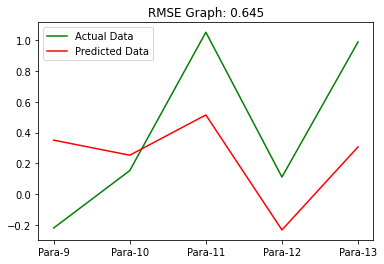

In [107]:
rmse_collection = []

mean_rmse = np.round(rmse_df.iloc[2, :].mean(axis=0), 3)
rmse_collection.append(mean_rmse)
line_1 = rmse_df.iloc[0, :]
line_2 = rmse_df.iloc[1, :]
fig, ax = plt.subplots()
ax.plot(line_1, color = 'green', label = 'Actual Data')
ax.plot(line_2, color = 'red', label = 'Predicted Data')
plt.title("RMSE Graph: "+str(mean_rmse))
ax.legend()
plt.show()

In [108]:
# FINAL RMSE ERROR

f_rmse = sum(rmse_collection)/len(rmse_collection)
print("RMSE: ", np.round(f_rmse, 3))

RMSE:  0.645
